# Letter-Recognition Project

This project uses a dataset to identify an english character. The Features extracted are statistical measurements of input characters.

### Required Libraries

The model used is k-Nearest Neighbors.

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
plt.style.use("seaborn")

### Importing our dataset

DataFrame obtained from: https://www.kaggle.com/nishan192/letterrecognition-using-svm?rvi=1

In [33]:
data = pd.read_csv("letter-recognition.csv")

The following data shows features extracted from different handwritten letters.

In [11]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Visualizing the data to see the occurrences of each Response Class.

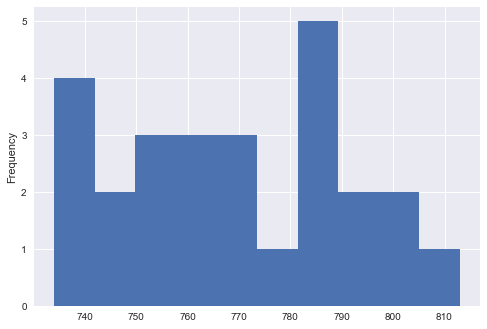

In [43]:
data.letter.value_counts().plot(kind = 'hist');

### Preparing data for fitting

In [34]:
# Predictor Classes 
X = data.drop('letter', axis=1)

# Response Vector
y = data['letter'].astype('category');

Defining our Model.

In [15]:
mdl = KNeighborsClassifier()

In [35]:
# Using Default Values for Hyper-Parameters
mdl.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Division of Data into Train and Test Data

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.15)

### Fitting the model & making predictions

In [19]:
mdl.fit(Xtrain, yTrain);

In [27]:
yPreds = mdl.predict(Xtest)
yPreds

array(['W', 'B', 'A', ..., 'E', 'T', 'V'], dtype=object)

### Evaluating the Model

In [30]:
mdl.score(Xtest, yTest)

0.9573333333333334

In [54]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yPreds))

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       133
           B       0.94      0.96      0.95       123
           C       0.99      0.98      0.98       124
           D       0.90      0.94      0.92       136
           E       0.91      0.98      0.94       104
           F       0.93      0.92      0.93       104
           G       0.98      0.94      0.96       118
           H       0.91      0.89      0.90       104
           I       0.92      0.96      0.94       109
           J       0.96      0.93      0.94       116
           K       0.95      0.92      0.93        98
           L       0.98      0.98      0.98       130
           M       0.99      1.00      1.00       107
           N       0.96      0.95      0.96       132
           O       0.92      0.97      0.95       117
           P       0.97      0.93      0.95       114
           Q       0.96      0.99      0.98       101
           R       0.88    

The score obtained is above threshold score, and thus we can move to exporting the model without tuning hyperparameters.

### Exporting the Trained Model

In [32]:
import pickle

pickle.dump(mdl, open("Letter-Recog.pkl", "wb"))